<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Recomendando el Blog de  Hernán Casciari 


[Hernán Casciari](https://hernancasciari.com/#bio), es un escritor argentino, que escribe blog posts con cuentos e historias  relacionadas con el futbol, su vida, infancia, y relaciones familiares con toques de ficción. Este [blog](https://hernancasciari.com/blog/) es  tan interesantes que en 2005 fue premiado como “El mejor blog del mundo” por Deutsche Welle de Alemania. 

El objetivo de este caso-taller es construir un sistema de recomendación basado en los contenidos de los posts utilizando similitud de las palabras usadas o temas de los cuentos.

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "Revisión por el compañero."

4. El archivo entregado debe poder ser ejecutado localmente por los pares. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos  en la misma ruta de acceso del cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

En la carpeta `data` se encuentran el archivo `blog_casciari.csv` con el título, la fecha de publicación, y el contenido de los cuentos publicados en el blog  de sr. Casciari. Cargue estos datos en su *cuaderno* y reporte brevemente el contenido de la base.
   

In [1]:
# Utilice este espacio para escribir el código.

# Utilice este espacio para escribir el código.
import pandas as pd

# Ruta a los archivos
ruta_archivo = 'data/blog_casciari.csv'

# Cargar el archivo CSV en un DataFrame
cuentos= pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del DataFrame para verificar que se cargó correctamente
print(cuentos.head())

                       titulo    fecha  \
0            El rincón blanco  1/11/08   
1  Mínimos avances en la cama  1/24/08   
2                  Don Marcos  2/19/08   
3              Los dos rulfos  3/26/08   
4   La noticia no es el perro  4/15/08   

                                              cuento  
0  De pronto yo estaba en el hogar donde pasé la ...  
1  Menos la cama, todo ha mejorado en este mundo....  
2  Dos veces, y no una, mi abuelo materno me ayud...  
3  A su regreso de México, mi amigo Comequechu no...  
4  De repente, un video de You Tube recibe un mil...  


In [2]:
cuentos['word_count'] = cuentos['cuento'].str.split().str.len()
cuentos['word_count'].describe()

count     520.000000
mean      882.319231
std       622.795353
min        95.000000
25%       508.750000
50%       702.000000
75%      1124.500000
max      5603.000000
Name: word_count, dtype: float64

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)

### 2. Homogenización de textos

Para cumplir con el objetivo de generar recomendaciones en esta sección debe preparar los posts para poder ser utilizados en su sistema de recomendación. Para ello, "limpie" y "tokenize" cada uno de los cuentos, describiendo detalladamente los pasos que realizo y si transformó o eliminó ciertas palabras. Para asistirlo en la tarea he creado listas de *stopwords* que están disponibles en la carpeta `data`. En su procedimiento ilustre la limpieza con el cuento 'La venganza del metegol'. (En su limpieza recuerde que el objetivo es generar recomendaciones a partir de la similitud de las palabras o temas de los cuentos)

In [3]:
# Utilice este espacio para escribir el código.
blog = cuentos['cuento'][16]
print (blog)

La publicidad muestra a un canario en una cocina. El pájaro va hasta la hornalla y es tragado por una campana extractora de la marca Balay, eficaz y silenciosa. Para que no haya problemas con las asociaciones que defienden los derechos del animal, unas letras pequeñitas advierten: ficción publicitaria, no sea cosa que alguien crea que han matado al pájaro en serio. Acaba la tanda y comienza el programa de Arguiñano. El cocinero mete un animal vivo en una olla. Lo vemos morir lentamente, sin letras pequeñas, sin culpa.
El hombre ecológico defiende al animal que grita y al animal que gesticula. Pero le importa muy poco el sufrimiento salvaje que no se oye o no se percibe. No hemos matado a este canario, dice la televisión, porque no es nuestra costumbre matar canarios. Pero hervimos vivo a los cangrejos, y también a los calamares, porque estamos habituados a hacerlo. Y porque además no chillan. Y porque su carne es rica.
Nos aterra el animal que se alborota cuando muere o cuando sufre. S

In [4]:
import re
import unidecode


# Quitamos tildes
blog = unidecode.unidecode(blog)
print(blog)

La publicidad muestra a un canario en una cocina. El pajaro va hasta la hornalla y es tragado por una campana extractora de la marca Balay, eficaz y silenciosa. Para que no haya problemas con las asociaciones que defienden los derechos del animal, unas letras pequenitas advierten: ficcion publicitaria, no sea cosa que alguien crea que han matado al pajaro en serio. Acaba la tanda y comienza el programa de Arguinano. El cocinero mete un animal vivo en una olla. Lo vemos morir lentamente, sin letras pequenas, sin culpa.
El hombre ecologico defiende al animal que grita y al animal que gesticula. Pero le importa muy poco el sufrimiento salvaje que no se oye o no se percibe. No hemos matado a este canario, dice la television, porque no es nuestra costumbre matar canarios. Pero hervimos vivo a los cangrejos, y tambien a los calamares, porque estamos habituados a hacerlo. Y porque ademas no chillan. Y porque su carne es rica.
Nos aterra el animal que se alborota cuando muere o cuando sufre. S

In [5]:
blog = re.sub('[^A-Za-z0-9 ]+', ' ', blog)
print(blog[0:1000])

La publicidad muestra a un canario en una cocina  El pajaro va hasta la hornalla y es tragado por una campana extractora de la marca Balay  eficaz y silenciosa  Para que no haya problemas con las asociaciones que defienden los derechos del animal  unas letras pequenitas advierten  ficcion publicitaria  no sea cosa que alguien crea que han matado al pajaro en serio  Acaba la tanda y comienza el programa de Arguinano  El cocinero mete un animal vivo en una olla  Lo vemos morir lentamente  sin letras pequenas  sin culpa El hombre ecologico defiende al animal que grita y al animal que gesticula  Pero le importa muy poco el sufrimiento salvaje que no se oye o no se percibe  No hemos matado a este canario  dice la television  porque no es nuestra costumbre matar canarios  Pero hervimos vivo a los cangrejos  y tambien a los calamares  porque estamos habituados a hacerlo  Y porque ademas no chillan  Y porque su carne es rica Nos aterra el animal que se alborota cuando muere o cuando sufre  Sob

In [6]:
blog = re.sub("\d+", "", blog)
blog = re.sub('\s+', ' ', blog)
blog = blog.strip()
print(blog[0:1000])

La publicidad muestra a un canario en una cocina El pajaro va hasta la hornalla y es tragado por una campana extractora de la marca Balay eficaz y silenciosa Para que no haya problemas con las asociaciones que defienden los derechos del animal unas letras pequenitas advierten ficcion publicitaria no sea cosa que alguien crea que han matado al pajaro en serio Acaba la tanda y comienza el programa de Arguinano El cocinero mete un animal vivo en una olla Lo vemos morir lentamente sin letras pequenas sin culpa El hombre ecologico defiende al animal que grita y al animal que gesticula Pero le importa muy poco el sufrimiento salvaje que no se oye o no se percibe No hemos matado a este canario dice la television porque no es nuestra costumbre matar canarios Pero hervimos vivo a los cangrejos y tambien a los calamares porque estamos habituados a hacerlo Y porque ademas no chillan Y porque su carne es rica Nos aterra el animal que se alborota cuando muere o cuando sufre Sobre todo si su sabor n

In [7]:
blog = blog.lower()
print(blog[0:1000])

la publicidad muestra a un canario en una cocina el pajaro va hasta la hornalla y es tragado por una campana extractora de la marca balay eficaz y silenciosa para que no haya problemas con las asociaciones que defienden los derechos del animal unas letras pequenitas advierten ficcion publicitaria no sea cosa que alguien crea que han matado al pajaro en serio acaba la tanda y comienza el programa de arguinano el cocinero mete un animal vivo en una olla lo vemos morir lentamente sin letras pequenas sin culpa el hombre ecologico defiende al animal que grita y al animal que gesticula pero le importa muy poco el sufrimiento salvaje que no se oye o no se percibe no hemos matado a este canario dice la television porque no es nuestra costumbre matar canarios pero hervimos vivo a los cangrejos y tambien a los calamares porque estamos habituados a hacerlo y porque ademas no chillan y porque su carne es rica nos aterra el animal que se alborota cuando muere o cuando sufre sobre todo si su sabor n

In [8]:
#!pip install spacy

In [9]:
#!python -m spacy download es_core_news_sm

In [10]:
# Cargamos la librería a utilizar
import spacy

# Cargar el modelo para el idioma deseado (por ejemplo, español)
nlp = spacy.load("es_core_news_sm")

#nltk.corpus import stopwords
#lista_stopwords = stopwords.words("spanish")


stopwords = pd.read_csv('data/stopwords_taller.csv', sep=',',header=None)
stopwords.columns = ['stopwords']

# Cargamos las stopwords extra
extra_stopwords = pd.read_csv('data/extra_stopwords.csv', sep=',',header=None)
extra_stopwords.columns = ['stopwords']


all_stopwords = pd.concat([stopwords, extra_stopwords]).drop_duplicates()

# Convertir la columna de stopwords en un set
extra_stopwords = set(all_stopwords['stopwords'])

# Agregamos a nuestro modelo de SpaCy
nlp.Defaults.stop_words |= extra_stopwords

blog = nlp(blog)

In [11]:
len(nlp.Defaults.stop_words)

765

In [12]:
blog = [token.text for token in blog if not token.is_stop]
blog = " ".join(blog)
print(blog[0:1000])

publicidad muestra canario cocina pajaro hornalla tragado campana extractora marca balay eficaz silenciosa problemas asociaciones defienden derechos animal letras pequenitas advierten ficcion publicitaria crea matado pajaro serio acaba tanda comienza programa arguinano cocinero mete animal vivo olla vemos morir lentamente letras pequenas culpa hombre ecologico defiende animal grita animal gesticula importa sufrimiento salvaje oye percibe matado canario television costumbre matar canarios hervimos vivo cangrejos calamares habituados chillan carne rica aterra animal alborota muere sufre sabor sabor exquisito perro muere cine llorar sacrificio pura sangre quebrado pata ah desgarra alma muerte caballo canciones folkloricas compuesto tema canciones hicimos palometa bagre pejerrey peces rio gritaran grita chancho arrancaria tiron anzuelo mojarras chicos pescarian mujeres existiria chacarera rio pretenden pesque cielo abierto meta horno cubierto salsa roquefort hombres matan pollos campo muje

In [13]:
nlp.vocab['comequechu'].is_stop

True

In [14]:
from nltk.stem.snowball import SpanishStemmer

stemmer = SpanishStemmer()

In [15]:
def text_cleaning(txt): # eliminar caracteres especiales 
    # Eliminar caracteres especiales
    out = unidecode.unidecode(txt) # tildes y virgulilla - nlp default.stopwords "las" incluye e.g. año no la limpiaria
    out = re.sub('[^A-Za-z0-9 ]+', ' ',out)
    out = re.sub("[^\\w\\s]|\n", ' ', out) # simbolos de puntuacion y retornos con esapcios
    out = re.sub("\d+", "", out) # numeros por espacios vacios
    out = re.sub('\s+', ' ', out) # remueve espacios extra
    out = out.lower() # Poner en minúsculas
    #NLP object
    out = nlp(out)
    # Eliminar Stopwords
    out = [token.text for token in out if not token.is_stop]
    out = " ".join(out)
    # Obtener los lemas de cada palabra
    lemmas =[token.lemma_ for token in nlp(out)]
    
    # Apply stemming OJO
    lemmas = [stemmer.stem(lemma) for lemma in lemmas]
    
    # Apply custom corrections OJO
    #lemmas = [custom_lemmas.get(lemma, lemma) for lemma in lemmas]
    
    
    # Convertir la lista de lemmas nuevamente a texto
    out = " ".join(lemmas)
    # Remover palabras muy cortas
    out = [token.text for token in nlp(out) if len(token) > 2]
    
    return out



In [16]:
venganza_metegol_idx = cuentos[cuentos['titulo'] == 'La venganza del metegol'].index
venganza_metegol = cuentos.loc[venganza_metegol_idx,'cuento']
wrd_cnt_vm = cuentos.loc[venganza_metegol_idx,'word_count']
print('Número de palabras en el cuento "La venganza del metegol":', wrd_cnt_vm);
venganza_metegol

Número de palabras en el cuento "La venganza del metegol": 160    1137
Name: word_count, dtype: int64


160    El mes pasado me invitaron a presentar un libr...
Name: cuento, dtype: object

In [17]:
clean = list(map(text_cleaning, cuentos['cuento']))

# Unimos las tokens
clean_sentences = [" ".join(i) for i in clean]

In [18]:
len(clean_sentences[160])

2677

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)

### 3. Generando Recomendaciones

En esta sección nos interesa generar recomendaciones de cuentos en el blog a un usuario que leyó 'La venganza del metegol'. Para ello vamos a utilizar distintas estrategias.

#### 3.1. Recomendaciones basadas en contenidos

##### 3.1.1. Genere 5 recomendaciones de más recomendada (1) a menos recomendada (5) para el cuento 'La venganza del metegol' usando en la distancia de coseno donde el texto este vectorizado por `CountVectorizer`. Explique el procedimiento que realizó y como ordenó las recomendaciones.

In [19]:
# Utilice este espacio para escribir el código.

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
type(clean_sentences)

list

In [21]:
#Definimos un objeto CountVectorizer y creamos los vectores
count = CountVectorizer()
count_matrix = count.fit_transform(clean_sentences)
count_matrix

<520x15839 sparse matrix of type '<class 'numpy.int64'>'
	with 118579 stored elements in Compressed Sparse Row format>

In [22]:
# Convertir la matriz dispersa a un DataFramem con el el vocabulario (palabras) que el CountVectorizer está utilizando
df_count_matrix = pd.DataFrame(count_matrix.toarray(), columns=count.get_feature_names_out())

# Ver las primeras filas del  DataFrame resultante con la matriz count y las palabras del vocabulario
df_count_matrix.head()

,aam,abaca,abaj,abalanz,aban,abanan,abandon,abaraj,abarat,abarc,...,zulu,zumb,zumbadis,zumr,zurd,zurdaz,zurdit,zurr,zurrar,zurrart
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
clean_words = df_count_matrix.columns.tolist()
clean_words

['aam',
 'abaca',
 'abaj',
 'abalanz',
 'aban',
 'abanan',
 'abandon',
 'abaraj',
 'abarat',
 'abarc',
 'abarrot',
 'abastec',
 'abat',
 'abbar',
 'abc',
 'abdom',
 'abdominal',
 'abduc',
 'abduccion',
 'abductor',
 'abeb',
 'abecedari',
 'aberr',
 'abiert',
 'abism',
 'abismal',
 'abland',
 'ablar',
 'able',
 'aboc',
 'abocar',
 'abofet',
 'abog',
 'abogaci',
 'abol',
 'aboleng',
 'aboll',
 'abolladur',
 'abomb',
 'abon',
 'abord',
 'abordar',
 'abort',
 'aboton',
 'abra',
 'abrac',
 'abraham',
 'abram',
 'abran',
 'abrar',
 'abraz',
 'abrazabam',
 'abrazadit',
 'abrazam',
 'abrazar',
 'abrazari',
 'abrazat',
 'abre',
 'abrevi',
 'abreviatur',
 'abri',
 'abrier',
 'abrieram',
 'abrig',
 'abrigar',
 'abrigat',
 'abril',
 'abrim',
 'abrir',
 'abriri',
 'abrirn',
 'abrirt',
 'abris',
 'abrist',
 'abro',
 'abroch',
 'abrochador',
 'abrocham',
 'abrum',
 'abrupt',
 'absces',
 'absolut',
 'absorb',
 'absorbent',
 'absorcion',
 'absort',
 'abstemi',
 'abstinent',
 'abstraccion',
 'abstract',

In [24]:
def find_similar_words_by_prefix(words, n, first_letter=None, tamaño_grupo = 3):
    # Filter words that start with the specified first letter, if given
    if first_letter:
        words = [word for word in words if word.startswith(first_letter)]
    
    # Dictionary to hold words by their prefixes
    prefix_dict = {}
    
    # Populate the dictionary with words grouped by their prefix
    for word in words:
        if len(word) >= n:
            prefix = word[:n]
            if prefix in prefix_dict:
                prefix_dict[prefix].append(word)
            else:
                prefix_dict[prefix] = [word]
    
    # Filter out prefixes with only one word
    similar_words = {prefix: group for prefix, group in prefix_dict.items() if len(group) > tamaño_grupo}
    
    return similar_words

In [25]:
similar_words = find_similar_words_by_prefix(clean_words, 5, None, 4)
similar_words

{'abraz': ['abraz',
  'abrazabam',
  'abrazadit',
  'abrazam',
  'abrazar',
  'abrazari',
  'abrazat'],
 'aburr': ['aburr',
  'aburri',
  'aburridisim',
  'aburrir',
  'aburriri',
  'aburrirn',
  'aburris'],
 'acaba': ['acabab', 'acababam', 'acabam', 'acabar', 'acabari'],
 'acord': ['acord',
  'acordais',
  'acordam',
  'acordandon',
  'acordar',
  'acordast',
  'acordat',
  'acordeon'],
 'acost': ['acost',
  'acostar',
  'acostarm',
  'acostarn',
  'acostat',
  'acostumbr',
  'acostumbram',
  'acostumbrar',
  'acostumbrart'],
 'actua': ['actuab', 'actuacion', 'actual', 'actualiz', 'actuar'],
 'adqui': ['adqui', 'adquier', 'adquir', 'adquiri', 'adquisicion', 'adquisit'],
 'adver': ['advers',
  'adversari',
  'advert',
  'advertent',
  'adverti',
  'advertir',
  'advertirt'],
 'agarr': ['agarr',
  'agarradit',
  'agarral',
  'agarrandot',
  'agarrar',
  'agarrat',
  'agarron',
  'agarrot'],
 'agrad': ['agrad',
  'agradar',
  'agradec',
  'agradecer',
  'agradeci',
  'agradeciendon',
  '

In [26]:
def save_similar_words_to_csv(similar_words, filename):
    # Create lists to hold the data
    data = []
    
    # Iterate over the dictionary and prepare rows for the DataFrame
    for prefix, words in similar_words.items():
        row = [prefix] + words
        data.append(row)
    
    # Create a DataFrame from the list of rows
    # Use 'Prefix' as the first column header and 'Word1', 'Word2', etc. for the remaining columns
    max_words = max(len(words) for words in similar_words.values())
    columns = ['Prefix'] + [f'Word{i+1}' for i in range(max_words)]
    
    df = pd.DataFrame(data, columns=columns)
    
    # Save the DataFrame to a CSV file
    df.to_csv(filename, index=False)

In [27]:
#save_similar_words_to_csv(similar_words, 'similar_words.csv')

In [28]:
lemas_raw = pd.read_csv('data/lemmas_raw.csv', sep=',')
lemas_raw.head()

,Prefix,Word1,Word2,Word3,Word4,Word5,Word6,Word7,Word8,Word9,Word10,Word11,Word12,Word13,Word14,Word15
0,abrazar,abraz,abrazab,abrazadit,abrazam,abrazar,abrazat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aburrir,aburr,aburri,aburridisim,aburrir,aburriri,aburris,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,acordar,acord,acordais,acordar,acordat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,acostar,acost,acostar,acostat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,acostumbrar,acostumbr,acostumbrar,acostumbrart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
def create_lemmas_dict_from_df(df):
    lemmas = {}
    
    for index, row in df.iterrows():
        prefix = row['Prefix']
        # Skip the prefix if it's NaN
        if pd.isna(prefix):
            continue
        
        for word in row[1:]:  # Iterate over Word1, Word2, ..., Word15 columns
            # Skip NaN values in words
            if pd.isna(word):
                continue
            
            # Create regex pattern for the word and map it to the lemma (prefix)
            pattern = rf"\b{re.escape(word)}\b"
            lemmas[pattern] = prefix
    
    return lemmas

In [30]:
lemmas_dict = create_lemmas_dict_from_df(lemas_raw)
lemmas_dict

{'\\babraz\\b': 'abrazar',
 '\\babrazab\\b': 'abrazar',
 '\\babrazadit\\b': 'abrazar',
 '\\babrazam\\b': 'abrazar',
 '\\babrazar\\b': 'abrazar',
 '\\babrazat\\b': 'abrazar',
 '\\baburr\\b': 'aburrir',
 '\\baburri\\b': 'aburrir',
 '\\baburridisim\\b': 'aburrir',
 '\\baburrir\\b': 'aburrir',
 '\\baburriri\\b': 'aburrir',
 '\\baburris\\b': 'aburrir',
 '\\bacord\\b': 'acordar',
 '\\bacordais\\b': 'acordar',
 '\\bacordar\\b': 'acordar',
 '\\bacordat\\b': 'acordar',
 '\\bacost\\b': 'acostar',
 '\\bacostar\\b': 'acostar',
 '\\bacostat\\b': 'acostar',
 '\\bacostumbr\\b': 'acostumbrar',
 '\\bacostumbrar\\b': 'acostumbrar',
 '\\bacostumbrart\\b': 'acostumbrar',
 '\\badvers\\b': 'adver',
 '\\badversari\\b': 'adver',
 '\\badvert\\b': 'advertir',
 '\\badvertent\\b': 'advertir',
 '\\badverti\\b': 'advertir',
 '\\badvertir\\b': 'advertir',
 '\\badvertirt\\b': 'advertir',
 '\\bagarr\\b': 'agarrar',
 '\\bagarradit\\b': 'agarrar',
 '\\bagarral\\b': 'agarrar',
 '\\bagarrandot\\b': 'agarrar',
 '\\bagarrar

In [31]:
# Lematizador propio
def Lematizador_propio(text, lemmas = lemmas_dict):
    
    # Buscar y reemplazar las palabras usando expresiones regulares
    for pattern, lemma in lemmas.items():
        text = re.sub(pattern, lemma, text, flags=re.IGNORECASE)

    return text

In [32]:
# Limpiamos nuestro texto con el lematizador propio
clean_sentences2 = list(map(Lematizador_propio, clean_sentences))

In [33]:
#Definimos un objeto CountVectorizer y creamos los vectores
count2 = CountVectorizer()
count_matrix2 = count.fit_transform(clean_sentences2)
count_matrix2

<520x14931 sparse matrix of type '<class 'numpy.int64'>'
	with 117378 stored elements in Compressed Sparse Row format>

In [34]:
# Convertir la matriz dispersa a un DataFramem con el el vocabulario (palabras) que el CountVectorizer está utilizando
df_count_matrix2 = pd.DataFrame(count_matrix2.toarray(), columns=count.get_feature_names_out())

# Ver las primeras filas del  DataFrame resultante con la matriz count y las palabras del vocabulario
df_count_matrix2.head()

,aam,abaca,abaj,abalanz,aban,abanan,abandon,abaraj,abarat,abarc,...,zulu,zumb,zumbadis,zumr,zurd,zurdaz,zurdit,zurr,zurrar,zurrart
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
from sklearn.metrics.pairwise import cosine_similarity

#Calculamos la matriz de similitud de coseno
cosine_sim_count2 = cosine_similarity(count_matrix2, count_matrix2)
cosine_sim_count2

array([[1.        , 0.14195528, 0.35095598, ..., 0.09311909, 0.14369377,
        0.22273709],
       [0.14195528, 1.        , 0.21882461, ..., 0.18381237, 0.12522357,
        0.19741199],
       [0.35095598, 0.21882461, 1.        , ..., 0.14656867, 0.16038601,
        0.27944515],
       ...,
       [0.09311909, 0.18381237, 0.14656867, ..., 1.        , 0.12291452,
        0.09474033],
       [0.14369377, 0.12522357, 0.16038601, ..., 0.12291452, 1.        ,
        0.21397284],
       [0.22273709, 0.19741199, 0.27944515, ..., 0.09474033, 0.21397284,
        1.        ]])

In [36]:
cosine_sim_count2.shape

(520, 520)

In [37]:
def recomendador(title, cosine_sim, df=cuentos):
    
    #Paso 2: serie que contiene como índice el título del cuento y el valor es el correspondiente índice 
    #del cuento original
    # df = df.reset_index()
    #indices = pd.Series(df.index, index=df['titulo']).drop_duplicates()
    indices = pd.Series(df.index, index=df['titulo'])
    #Paso 3: Obtenemos el índice del cuento a partir de la asignación inversa de índices del paso anterior
    idx = indices[title] 
    print(idx)

    #Paso 4: Obtenemos la similitud de coseno para esa película en particular con todas las películas. 
    #Convertimos esto en una lista de tuplas donde el primer elemento es la posición y el segundo es 
    #la similitud.
    sim_scores = list(enumerate(cosine_sim[idx]))

    #Paso 5: Obtenemos esta lista de tuplas sobre la base de la similitud.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    #Paso 6: Obtenemos los 5 elementos top de esta lista ignorando el primer elemento ya que será la puntuación consigo misma.
    sim_scores = sim_scores[1:6]

    cuento_indices = [i[0] for i in sim_scores]

    #Paso 7
    return cuentos['titulo'].iloc[cuento_indices]

In [38]:
recomendador('La venganza del metegol', cosine_sim_count2)

160


17                    Cuento con bruja y tramontina
5                         El milagro de los pueblos
121                                   Gaussian blur
416              Hace seis años también era domingo
389    Una línea de puntos en un libro de catecismo
Name: titulo, dtype: object

In [39]:
#!pip install wordcloud

160


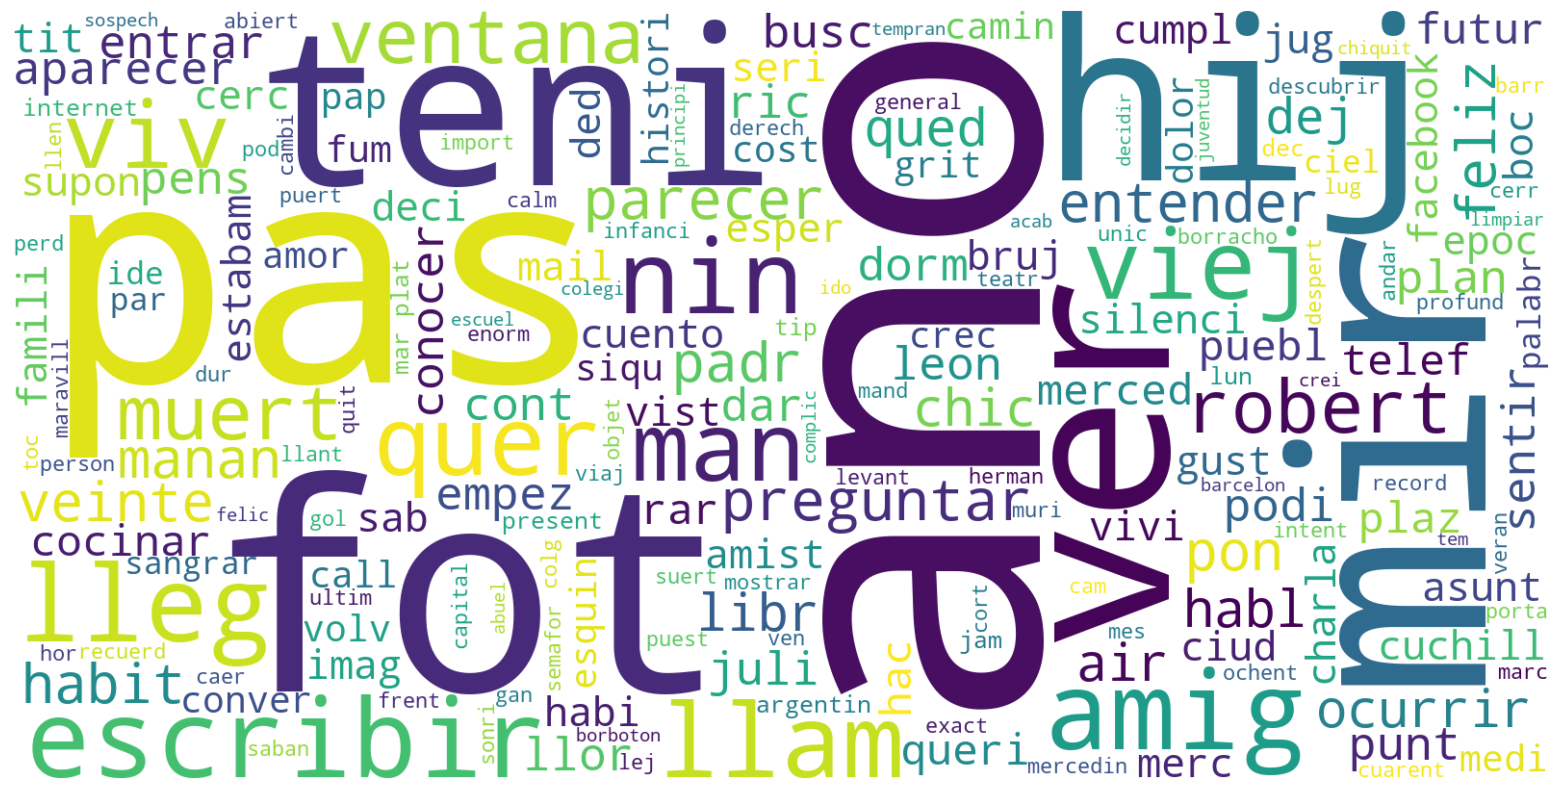

In [40]:
# Cargamos las librerías a utilizar
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#ponemos en un vector las peliculas recomendadas
cuentos_rec=cuentos[cuentos['titulo'].isin(recomendador('La venganza del metegol', cosine_sim_count2))]

#Limpiamos el texto
text = " ".join(cuentos_rec['cuento'])
text = text_cleaning(text)
text=' '.join(text)
text = Lematizador_propio(text)

# Armamos la nube de palabras
wordcloud = WordCloud(width = 1600, height = 800, 
    background_color = "white").generate(text)
plt.figure(figsize = (20, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)

##### 3.1.2. Genere 5 recomendaciones de más recomendada (1) a menos recomendada (5) para  el cuento 'La venganza del metegol' usando nuevamente la distancia de coseno, pero ahora vectorice el texto usando `TF-IDFVectorizer`. Explique el procedimiento que realizó y como ordenó las recomendaciones. Compare con los resultados del punto anterior y explique sus similitudes y/o diferencias.

In [41]:
# Utilice este espacio para escribir el código.

# Utilice este espacio para escribir el código.
from sklearn.feature_extraction.text import TfidfVectorizer

#Definimos el objeto TF-IDF Vectorizer Object
tfidf = TfidfVectorizer()

In [42]:
#Construimos la matriz TF-IDF
tfidf_matrix2 = tfidf.fit_transform(clean_sentences2)

#Dimensiones de la matriz
tfidf_matrix2.shape

(520, 14931)

In [43]:
# Convertir la matriz dispersa a un DataFramem con el el vocabulario (palabras) que el TfidfVectorizer está utilizando
df_tfidf2 = pd.DataFrame(tfidf_matrix2.toarray(), columns=tfidf.get_feature_names_out())

# Ver las primeras filas del  DataFrame resultante con la matriz TF-IDF y las palabras del vocabulario
df_tfidf2.head()

,aam,abaca,abaj,abalanz,aban,abanan,abandon,abaraj,abarat,abarc,...,zulu,zumb,zumbadis,zumr,zurd,zurdaz,zurdit,zurr,zurrar,zurrart
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.025085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.018093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# Cargamos las funciones a utilizar
from sklearn.metrics.pairwise import linear_kernel

# Calculamos el producto punto
cosine_sim_tfidf2 = linear_kernel(tfidf_matrix2, tfidf_matrix2)

In [45]:
recomendador('La venganza del metegol', cosine_sim_tfidf2)

160


17                       Cuento con bruja y tramontina
138    Nueve libros que me hicieron olvidar el Mundial
12                           Abrir y cerrar un círculo
5                            El milagro de los pueblos
121                                      Gaussian blur
Name: titulo, dtype: object

160


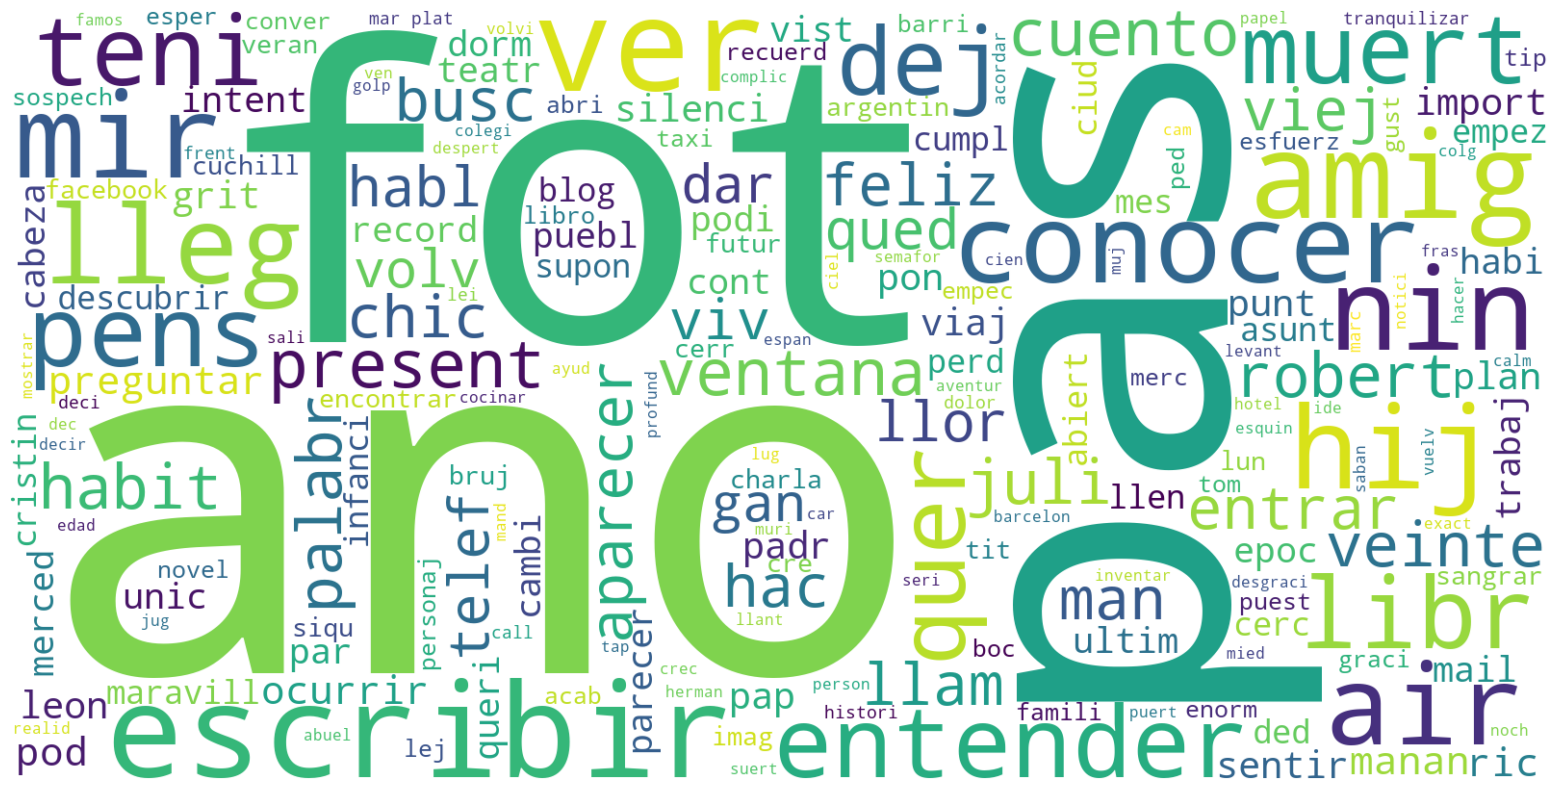

In [46]:
# Cargamos las librerías a utilizar
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#ponemos en un vector las peliculas recomendadas
cuentos_rec=cuentos[cuentos['titulo'].isin(recomendador('La venganza del metegol', cosine_sim_tfidf2))]

#Limpiamos el texto
text = " ".join(cuentos_rec['cuento'])
text = text_cleaning(text)
text=' '.join(text)
text = Lematizador_propio(text)

# Armamos la nube de palabras
wordcloud = WordCloud(width = 1600, height = 800, 
    background_color = "white").generate(text)
plt.figure(figsize = (20, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)

##### 3.1.3. Genere 5 recomendaciones de más recomendada (1) a menos recomendada (5) para el cuento 'La venganza del metegol' usando el texto vectorizado por `TF-IDFVectorizer` y la correlación como medida de similitud. Explique el procedimiento que realizó y como ordenó las recomendaciones. Compare con los resultados de los puntos anteriores y explique sus similitudes y/o diferencias.

In [47]:
# Utilice este espacio para escribir el código.
import numpy as np

#1-np.corrcoef(tf.toarray())

# Utilice este espacio para escribir el código.
def recomendador_correlacion(title, tfidf_matrix, df=cuentos):
    # Crear una Serie que contiene como índice el título del cuento y el valor correspondiente al índice
    indices = pd.Series(df.index, index=df['titulo'])
    
    # Obtener el índice del cuento a partir del título
    idx = indices[title] 
    print('Indice: ', idx)
    print('Titulo: ', title)

    # Obtener el vector TF-IDF del cuento objetivo
    target_vector = tfidf_matrix[idx].toarray().flatten()

    # Calcular la correlación entre el vector del cuento objetivo y todos los vectores
    correlations = []
    for i in range(tfidf_matrix.shape[0]):
        if i != idx:
            vector = tfidf_matrix[i].toarray().flatten()
            # Correlación = 1 - distancia para convertir distancia en correlación
            corr = 1 - correlation(target_vector, vector)
            correlations.append((i, corr))
    
    # Ordenar la lista de tuplas por la correlación en orden descendente
    correlations = sorted(correlations, key=lambda x: x[1], reverse=True)

    # Obtener los 5 cuentos más similares ignorando el primero (que es el mismo cuento)
    correlations = correlations[1:6]

    # Obtener los índices y las correlaciones
    cuento_indices = [i[0] for i in correlations]
    correlation_values = [i[1] for i in correlations]

    # Crear un DataFrame para mostrar los resultados
    result_df = pd.DataFrame({
        'Índice': cuento_indices,
        'Título': df['titulo'].iloc[cuento_indices].values,
        'Correlación': correlation_values
    })

    # Imprimir los cuentos recomendados con sus índices y correlaciones
    print('\nCuentos recomendados:')
    print(result_df)
    
    # Retornar el DataFrame con los resultados
    return result_df




In [48]:
from scipy.spatial.distance import correlation


recomendador_correlacion('La venganza del metegol', tfidf_matrix2)

Indice:  160
Titulo:  La venganza del metegol

Cuentos recomendados:
   Índice                                           Título  Correlación
0      12                        Abrir y cerrar un círculo     0.105886
1       5                        El milagro de los pueblos     0.105714
2     138  Nueve libros que me hicieron olvidar el Mundial     0.104705
3     121                                    Gaussian blur     0.103580
4     389     Una línea de puntos en un libro de catecismo     0.098913


,Índice,Título,Correlación
0,12,Abrir y cerrar un círculo,0.105886
1,5,El milagro de los pueblos,0.105714
2,138,Nueve libros que me hicieron olvidar el Mundial,0.104705
3,121,Gaussian blur,0.103580
4,389,Una línea de puntos en un libro de catecismo,0.098913


(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)

##### 3.2. Recomendaciones basadas en temas

Usando modelado de temas con LDA, encuentre los temas subyacentes en el blog. Explique como eligió el numero óptimo de temas. Utilizando el tema asignado al cuento 'La venganza del metegol' y la probabilidad de pertenecer a este tema genere 5 recomendaciones de más recomendada (1) a menos recomendada (5) para este cuento. Explique el procedimiento que realizó. Compare con los resultados encontrados anteriormente y explique sus similitudes y/o diferencias. (Esto puede tomar mucho tiempo y requerir mucha capacidad computacional, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [49]:
# Utilice este espacio para escribir el código.

from gensim.corpora import Dictionary

# Creamos la representación de diccionario del documento
dictionary = Dictionary(clean)
dictionary

In [50]:
# remover palabras que aparecen en menos de 20 páginas o en más de 50% de las páginas
dictionary.filter_extremes(no_below=20, no_above=0.5)

In [51]:
corpus = [dictionary.doc2bow(doc) for doc in clean]

print('Numero de palabras únicas: %d' % len(dictionary))

Numero de palabras únicas: 1295


In [53]:
from gensim.models import LdaModel

Estimacion = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=4,
    chunksize=1000,
    passes=20,
    iterations=400,
    alpha='auto',
    eta='auto',
    random_state=123,
    eval_every=None
)


In [54]:
from pprint import pprint

pprint(Estimacion.print_topics())

[(0,
  '0.009*"teni" + 0.007*"amig" + 0.007*"ver" + 0.006*"mes" + 0.005*"pregunt" + '
  '0.005*"pod" + 0.005*"man" + 0.005*"quer" + 0.005*"empez" + 0.005*"loc"'),
 (1,
  '0.008*"llam" + 0.007*"argentin" + 0.007*"escrib" + 0.005*"muert" + '
  '0.005*"public" + 0.005*"ocurr" + 0.004*"palabr" + 0.004*"histori" + '
  '0.004*"espanol" + 0.004*"lector"'),
 (2,
  '0.024*"zacari" + 0.018*"cai" + 0.013*"sofi" + 0.012*"nach" + 0.010*"viej" + '
  '0.009*"chic" + 0.008*"nen" + 0.008*"llor" + 0.007*"pregunt" + '
  '0.007*"cabez"'),
 (3,
  '0.013*"argentin" + 0.011*"mundial" + 0.010*"futbol" + 0.009*"part" + '
  '0.008*"hombr" + 0.008*"jug" + 0.008*"gol" + 0.007*"viej" + 0.007*"muj" + '
  '0.006*"chic"')]


### Medida de coherencia

In [63]:
#!pip install pyLDAvis

     ---------------------------------------- 0.0/59.0 kB ? eta -:--:--
     ---------------------------------------- 59.0/59.0 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
INFO: pip is looking at multiple versions of pyfume to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 81.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/59.6 kB ? eta -:--:--
   ---------------------------------------- 59.6/59.6 kB ? eta 0:00:00
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20448 sha256=c958162642b78f80128dc48e81bbbd73b1d0741e974481c3f51dee25c1c049cc
  Stored in directory: c:\users\user\appdata\local\pip\cache\w


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
# Visualizamos los resultados
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
LDA_visualization = gensimvis.prepare(Estimacion, corpus, dictionary)
LDA_visualization

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.003897 -0.035698       1        1  34.004852
1      0.087656 -0.028497       2        1  33.092791
2     -0.106953 -0.006684       3        1  18.034591
3      0.023194  0.070879       4        1  14.867766, topic_info=          Term        Freq       Total Category  logprob  loglift
1282    zacari  456.000000  456.000000  Default  30.0000  30.0000
824        cai  355.000000  355.000000  Default  29.0000  29.0000
1287      sofi  247.000000  247.000000  Default  28.0000  28.0000
432   argentin  495.000000  495.000000  Default  27.0000  27.0000
1231      nach  229.000000  229.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
497       habl   72.935543  452.796688   Topic4  -5.3766   0.0801
421        viv   65.860534  378.883436   Topic4  -5.4786   0.1563
398       seri   63.908346  358.821470   Topic4  -5.5087   0.1806
171        man   65.248634  440.109453   Topic4  -5.4880  -0.0028
32         boc   56.410424  229.483522   Topic4  -5.6335   0.5028

[282 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
4         1  0.243186   abuel
4         2  0.193556   abuel
4         3  0.516149   abuel
4         4  0.049630   abuel
5         1  0.196029     aca
...     ...       ...     ...
1282      3  0.994747  zacari
1282      4  0.002191  zacari
600       1  0.826558   zapat
600       3  0.141696   zapat
600       4  0.023616   zapat

[757 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4])

In [55]:
from gensim.models import CoherenceModel

coherencemodel = CoherenceModel(model=Estimacion, texts=clean, dictionary=dictionary)
coherencemodel.get_coherence() 

0.3954937459092096

In [56]:
from gensim.models.ldamulticore import LdaMulticore

def calcular_coherencia(dictionary, corpus, texts, start=1, limit=10, step=1):
 
    coherence_values = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus,
                        id2word=dictionary,
                        num_topics=num_topics, 
                        random_state=123,
                        passes=20)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [57]:
modelos, valores_c = calcular_coherencia(dictionary=dictionary, corpus=corpus, texts=clean, start=1, limit=10, step=1)

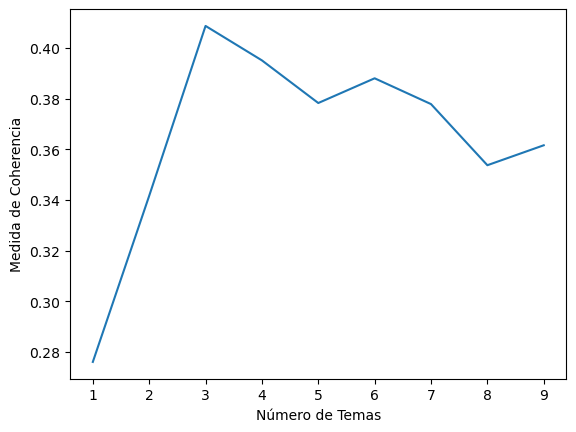

In [58]:
import matplotlib.pyplot as plt
# Show graph
limit=10; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, valores_c)
plt.xlabel("Número de Temas")
plt.ylabel("Medida de Coherencia")
plt.show()

In [65]:
lda_model_opt = LdaMulticore(corpus = corpus,
    id2word = dictionary,
    num_topics = 3,
    random_state=123)
pyLDAvis.enable_notebook()
LDA_visualization = gensimvis.prepare(lda_model_opt, corpus, dictionary)
LDA_visualization

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.004324  0.000633       1        1  38.276679
0      0.001491 -0.003376       2        1  30.903634
2      0.002833  0.002743       3        1  30.819687, topic_info=          Term        Freq       Total Category  logprob  loglift
1282    zacari  454.000000  454.000000  Default  30.0000  30.0000
824        cai  353.000000  353.000000  Default  29.0000  29.0000
275       viej  480.000000  480.000000  Default  28.0000  28.0000
348      hombr  411.000000  411.000000  Default  27.0000  27.0000
398       seri  357.000000  357.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
260       teni  128.294476  514.914622   Topic3  -5.5408  -0.2127
432   argentin  127.634480  517.693722   Topic3  -5.5460  -0.2232
178        mes  116.265362  450.798607   Topic3  -5.6393  -0.1781
495       grit  101.321487  338.534020   Topic3  -5.7768  -0.0293
97      escrib  101.639855  380.343366   Topic3  -5.7737  -0.1426

[253 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
4         1  0.466731   abuel
4         2  0.193644   abuel
4         3  0.337636   abuel
6         1  0.343604    acab
6         2  0.277526    acab
...     ...       ...     ...
277       2  0.290069     voz
277       3  0.213986     voz
1282      1  0.226851  zacari
1282      2  0.314948  zacari
1282      3  0.455904  zacari

[519 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

In [66]:
np.exp2(-lda_model_opt.log_perplexity(corpus))

121.17560143785448

In [67]:
def perplejidad_ntemas(dictionary, corpus, texts, start=1, limit=10, step=1):
 
    perplejidad_values = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus,
                        id2word=dictionary,
                        num_topics=num_topics, 
                        random_state=123,
                        passes=20)
        model_list.append(model)
        perplejidad_values.append(np.exp2(-model.log_perplexity(corpus)))

    return model_list, perplejidad_values

In [68]:
modelos, valores_p = perplejidad_ntemas(dictionary=dictionary, corpus=corpus, texts=clean, start=1, limit=10, step=1)

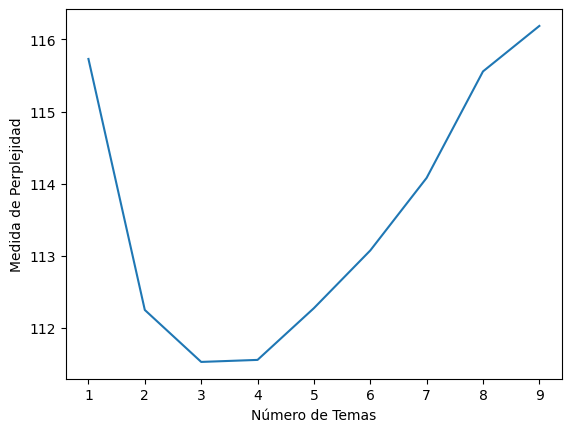

In [69]:
import matplotlib.pyplot as plt
# Show graph
limit=10; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, valores_p)
plt.xlabel("Número de Temas")
plt.ylabel("Medida de Perplejidad")

plt.show()

In [70]:
Estimacion = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=3,
    chunksize=1000,
    passes=20,
    iterations=400,
    alpha='auto',
    eta='auto',
    random_state=123,
    eval_every=None
)


pprint(Estimacion.print_topics())

[(0,
  '0.008*"teni" + 0.007*"amig" + 0.006*"ver" + 0.006*"pregunt" + 0.005*"muj" + '
  '0.005*"man" + 0.005*"mes" + 0.005*"quer" + 0.005*"pod" + 0.005*"empez"'),
 (1,
  '0.010*"argentin" + 0.007*"llam" + 0.005*"escrib" + 0.005*"pais" + '
  '0.005*"hombr" + 0.005*"muert" + 0.004*"chic" + 0.004*"mundial" + '
  '0.004*"espan" + 0.004*"part"'),
 (2,
  '0.021*"zacari" + 0.016*"cai" + 0.011*"sofi" + 0.011*"viej" + 0.010*"nach" + '
  '0.009*"chic" + 0.008*"llor" + 0.007*"nen" + 0.007*"pregunt" + 0.007*"grit"')]


In [71]:
?LdaModel.get_document_topics


In [72]:
l=[Estimacion.get_document_topics(item) for item in corpus]
l

[[(0, 0.99970853)],
 [(0, 0.55110234), (1, 0.44871753)],
 [(0, 0.5824032), (1, 0.37821773), (2, 0.039379094)],
 [(0, 0.3656802), (1, 0.6341692)],
 [(0, 0.2065258), (1, 0.7933286)],
 [(0, 0.9994786)],
 [(0, 0.99988526)],
 [(1, 0.99978346)],
 [(0, 0.9062725), (1, 0.09360969)],
 [(0, 0.69330734), (1, 0.3065162)],
 [(0, 0.570399), (1, 0.4294933)],
 [(0, 0.3003259), (2, 0.6993807)],
 [(0, 0.4208501), (1, 0.5790148)],
 [(1, 0.99955076)],
 [(0, 0.44211295), (1, 0.5577914)],
 [(0, 0.79003227), (1, 0.2098319)],
 [(0, 0.5820661), (1, 0.20645016), (2, 0.2114837)],
 [(0, 0.99971503)],
 [(1, 0.99962974)],
 [(0, 0.26729685), (1, 0.73256147)],
 [(1, 0.99963754)],
 [(0, 0.6045154), (1, 0.3953267)],
 [(0, 0.38859555), (1, 0.6112138)],
 [(1, 0.9986545)],
 [(1, 0.99976194)],
 [(1, 0.9989582)],
 [(1, 0.93337846), (2, 0.06594038)],
 [(1, 0.999049)],
 [(1, 0.99953866)],
 [(1, 0.999071)],
 [(1, 0.9989109)],
 [(1, 0.9988482)],
 [(1, 0.9990852)],
 [(0, 0.33318204), (1, 0.6663194)],
 [(1, 0.99908525)],
 [(1, 0.

In [73]:
l[160]

[(0, 0.7336707), (1, 0.26612294)]

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)

### 4 Recomendaciones generales

De acuerdo con los resultados encontrados, en su opinión ¿qué procedimiento generó las mejores recomendaciones para la entrada elegida? ¿Cómo implementaría una evaluación objetiva de estas recomendaciones? Justifique su respuesta.

(Utilice este espacio para describir su procedimiento)